<a href="https://colab.research.google.com/github/Prakash-Sankalan/Q-Semantic_Communication/blob/main/QSG_Qsemantic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install qiskit[all]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 110.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.5/541.5 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 11.6 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=28fe1002f5726a76994ba3d054f0949

In [10]:
import pandas as pd

In [4]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, random_statevector
from qiskit.circuit.library import RXGate, RYGate
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
class QuantumSemanticEncoder:
    def __init__(self, word_embeddings):
        """
        Initialize with word embeddings (dict of {word: np.array})
        Converts semantic embeddings to quantum states
        """
        self.words = list(word_embeddings.keys())
        self.embeddings = np.array(list(word_embeddings.values()))
        self.num_qubits = int(np.ceil(np.log2(len(self.words))))

    def encode_word(self, word):
        """Encode word as a quantum basis state"""
        try:
            idx = self.words.index(word)
            qc = QuantumCircuit(self.num_qubits)
            binary = format(idx, f'0{self.num_qubits}b')
            for qubit, bit in enumerate(binary):
                if bit == '1':
                    qc.x(qubit)
            return qc
        except ValueError:
            raise ValueError(f"Word '{word}' not in vocabulary")

    def semantic_similarity(self, word1, word2):
        """Calculate similarity using statevector overlap"""
        sv1 = Statevector.from_instruction(self.encode_word(word1))
        sv2 = Statevector.from_instruction(self.encode_word(word2))
        return abs(sv1.inner(sv2))**2  # Fidelity between states


In [6]:
class QuantumChannel:
    def __init__(self, noise_level=0.1):
        """Simulates noisy quantum channel"""
        self.noise_level = noise_level

    def transmit(self, circuit):
        """Apply depolarizing noise to a circuit"""
        # Convert to density matrix
        sv = Statevector.from_instruction(circuit)
        rho = np.outer(sv.data, sv.data.conj())

        # Apply noise
        noisy_rho = (1-self.noise_level)*rho + \
                   (self.noise_level/(2**circuit.num_qubits))*np.eye(2**circuit.num_qubits)
        return Statevector(noisy_rho)

In [7]:
class LinkSelector:
    def __init__(self, channels):
        """Initialize with available quantum channels"""
        self.channels = channels

    def select_link(self, semantic_importance):
        """Select channel based on semantic importance and quality"""
        scores = []
        for channel in self.channels:
            # Score combines channel quality and semantic importance
            score = (1 - channel.noise_level) * semantic_importance
            scores.append(score)
        return self.channels[np.argmax(scores)]

In [8]:
# Verified imports
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, DensityMatrix
from sklearn.metrics.pairwise import cosine_similarity

# ==================
# 1. Quantum Semantic Encoder
# ==================
class QuantumSemanticEncoder:
    def __init__(self, word_embeddings):
        self.words = list(word_embeddings.keys())
        self.embeddings = np.array(list(word_embeddings.values()))
        self.num_qubits = int(np.ceil(np.log2(len(self.words))))

        # Normalize embeddings for quantum states
        self.normalized_embeddings = self.embeddings / np.linalg.norm(self.embeddings, axis=1, keepdims=True)

    def encode_word(self, word):
        """Encode word as a quantum statevector"""
        try:
            idx = self.words.index(word)
            # Create statevector directly from normalized embedding
            state = np.zeros(2**self.num_qubits, dtype=complex)
            emb = self.normalized_embeddings[idx]
            state[:len(emb)] = emb
            return Statevector(state)
        except ValueError:
            raise ValueError(f"Word '{word}' not in vocabulary")

# ==================
# 2. Quantum Channel (Fixed)
# ==================
class QuantumChannel:
    def __init__(self, noise_level=0.1):
        self.noise_level = noise_level

    def transmit(self, statevector):
        """Apply depolarizing noise and return as DensityMatrix"""
        rho = np.outer(statevector.data, statevector.data.conj())
        noisy_rho = (1-self.noise_level)*rho + \
                   (self.noise_level/(2**statevector.num_qubits))*np.eye(2**statevector.num_qubits)
        return DensityMatrix(noisy_rho)

# ==================
# 3. Link Selector
# ==================
class LinkSelector:
    def __init__(self, channels):
        self.channels = channels

    def select_link(self, semantic_importance):
        scores = []
        for channel in self.channels:
            score = (1 - channel.noise_level) * semantic_importance
            scores.append(score)
        return self.channels[np.argmax(scores)]

# ==================
# Example Usage (Fixed)
# ==================
if __name__ == "__main__":
    # Sample embeddings (power of 2 dimensions)
    embeddings = {
        "quantum": [0.9, 0.1, 0.2, 0.3],
        "network": [0.2, 0.8, 0.1, 0.1],
        "protocol": [0.7, 0.3, 0.5, 0.2],
        "data": [0.1, 0.9, 0.1, 0.3]
    }

    # Initialize components
    encoder = QuantumSemanticEncoder(embeddings)
    channels = [
        QuantumChannel(noise_level=0.05),  # High quality
        QuantumChannel(noise_level=0.3),   # Medium quality
        QuantumChannel(noise_level=0.5)    # Low quality
    ]
    selector = LinkSelector(channels)

    # Example transmission
    word = "quantum"
    importance = 0.9  # High importance

    # 1. Select best channel
    selected_channel = selector.select_link(importance)
    print(f"Selected channel with noise level: {selected_channel.noise_level}")

    # 2. Encode word
    encoded_state = encoder.encode_word(word)
    print("\nEncoded statevector:")
    print(encoded_state.data)

    # 3. Transmit through noisy channel
    received_state = selected_channel.transmit(encoded_state)
    print("\nReceived density matrix:")
    print(received_state.data)

# Manual fidelity calculation
def calculate_fidelity(statevector, density_matrix):
    """
    Calculate fidelity F(ρ,σ) = (tr[√(√ρ σ √ρ)])²
    For pure state ψ and mixed state ρ: F = ⟨ψ|ρ|ψ⟩
    """
    # For statevector |ψ⟩ and density matrix ρ:
    # F = ⟨ψ|ρ|ψ⟩
    psi = statevector.data
    rho = density_matrix.data
    fidelity = np.vdot(psi, rho @ psi).real  # ⟨ψ|ρ|ψ⟩
    return fidelity

# In your example usage, replace the fidelity line with:
fidelity = calculate_fidelity(encoded_state, received_state)
print(f"\nFidelity with original: {fidelity:.4f}")

Selected channel with noise level: 0.05

Encoded statevector:
[0.92338052+0.j 0.10259784+0.j 0.20519567+0.j 0.30779351+0.j]

Received density matrix:
[[0.8225+0.j 0.09  +0.j 0.18  +0.j 0.27  +0.j]
 [0.09  +0.j 0.0225+0.j 0.02  +0.j 0.03  +0.j]
 [0.18  +0.j 0.02  +0.j 0.0525+0.j 0.06  +0.j]
 [0.27  +0.j 0.03  +0.j 0.06  +0.j 0.1025+0.j]]

Fidelity with original: 0.9625


In [9]:
# Required Libraries
import numpy as np
from qiskit.quantum_info import Statevector, DensityMatrix
from sklearn.metrics.pairwise import cosine_similarity

# ==========================
# 1. Quantum Semantic Encoder
# ==========================
class QuantumSemanticEncoder:
    def __init__(self, word_embeddings):
        self.words = list(word_embeddings.keys())
        self.embeddings = np.array(list(word_embeddings.values()))
        self.num_qubits = int(np.ceil(np.log2(len(self.embeddings[0]))))
        self.normalized_embeddings = self.embeddings / np.linalg.norm(self.embeddings, axis=1, keepdims=True)

    def encode_word(self, word):
        if word not in self.words:
            raise ValueError(f"Word '{word}' not found in vocabulary.")
        idx = self.words.index(word)
        embedding = self.normalized_embeddings[idx]
        state = np.zeros(2 ** self.num_qubits, dtype=complex)
        state[:len(embedding)] = embedding
        return Statevector(state)

# ==========================
# 2. Quantum Stochastic Geometry (QSG)
# ==========================
def generate_node_positions(num_nodes, area_size):
    return np.random.rand(num_nodes, 2) * area_size

def compute_interference(receiver_pos, node_positions, decay_factor=2.0):
    distances = np.linalg.norm(node_positions - receiver_pos, axis=1)
    distances[distances == 0] = 1e-9  # prevent division by zero
    return np.sum(1 / (distances ** decay_factor))

# ==========================
# 3. Quantum Channel with Interference
# ==========================
class QuantumChannel:
    def __init__(self, noise_level, position):
        self.noise_level = noise_level
        self.position = position
        self.interference = 0  # will be updated based on QSG

    def transmit(self, statevector):
        rho = np.outer(statevector.data, statevector.data.conj())
        dim = 2 ** statevector.num_qubits
        noisy_rho = (1 - self.noise_level) * rho + (self.noise_level / dim) * np.eye(dim)
        return DensityMatrix(noisy_rho)

# ==========================
# 4. TOPSIS for Link Selection
# ==========================
class TopsisSelector:
    def __init__(self, channels):
        self.channels = channels

    def normalize_matrix(self, matrix):
        norm = np.linalg.norm(matrix, axis=0)
        return matrix / norm

    def topsis_score(self, decision_matrix, weights):
        norm_matrix = self.normalize_matrix(decision_matrix)
        weighted_matrix = norm_matrix * weights
        ideal_best = np.max(weighted_matrix, axis=0)
        ideal_worst = np.min(weighted_matrix, axis=0)
        dist_best = np.linalg.norm(weighted_matrix - ideal_best, axis=1)
        dist_worst = np.linalg.norm(weighted_matrix - ideal_worst, axis=1)
        return dist_worst / (dist_best + dist_worst)

    def select_best_channel(self, semantic_importance):
        # Build decision matrix: [1-noise, 1-interference, semantic importance]
        matrix = []
        for ch in self.channels:
            matrix.append([
                1 - ch.noise_level,
                1 / (1 + ch.interference),  # lower interference → higher score
                semantic_importance
            ])
        matrix = np.array(matrix)
        weights = np.array([0.4, 0.4, 0.2])  # can adjust or compute via FAHP
        scores = self.topsis_score(matrix, weights)
        best_index = np.argmax(scores)
        return self.channels[best_index], scores

# ==========================
# 5. Fidelity Calculation
# ==========================
def calculate_fidelity(statevector, density_matrix):
    psi = statevector.data
    rho = density_matrix.data
    return np.vdot(psi, rho @ psi).real

# ==========================
# 6. Example Simulation
# ==========================
if __name__ == "__main__":
    # === Word Embeddings ===
    embeddings = {
        "quantum": [0.9, 0.1, 0.2, 0.3],
        "network": [0.2, 0.8, 0.1, 0.1],
        "protocol": [0.7, 0.3, 0.5, 0.2],
        "data": [0.1, 0.9, 0.1, 0.3]
    }
    encoder = QuantumSemanticEncoder(embeddings)

    # === Generate Channels with QSG ===
    area_size = 10
    num_channels = 3
    receiver_position = np.array([5.0, 5.0])
    channel_positions = generate_node_positions(num_channels, area_size)
    noise_levels = [0.05, 0.3, 0.5]

    channels = []
    for i in range(num_channels):
        ch = QuantumChannel(noise_levels[i], channel_positions[i])
        ch.interference = compute_interference(receiver_position, np.delete(channel_positions, i, axis=0))
        channels.append(ch)

    # === Select Word and Importance ===
    word = "quantum"
    importance = 0.9

    # === Encode and Select Best Channel ===
    encoded = encoder.encode_word(word)
    selector = TopsisSelector(channels)
    best_channel, scores = selector.select_best_channel(importance)

    print("\nTOPSIS Scores:", scores)
    print("Selected channel:")
    print(f"  Noise: {best_channel.noise_level}")
    print(f"  Interference: {best_channel.interference:.4f}")
    print(f"  Position: {best_channel.position}")

    # === Transmit and Evaluate Fidelity ===
    received = best_channel.transmit(encoded)
    fidelity = calculate_fidelity(encoded, received)
    print(f"\nFidelity with original state: {fidelity:.4f}")



TOPSIS Scores: [1.         0.40543671 0.07580716]
Selected channel:
  Noise: 0.05
  Interference: 0.2193
  Position: [5.76690325 6.51367824]

Fidelity with original state: 0.9625



TOPSIS Scores: [1.00000000e+00 1.84669840e-01 1.05466746e-04]
Selected channel:
  Noise: 0.05
  Interference: 0.0598
  Position: [4.40067711 4.87264835]


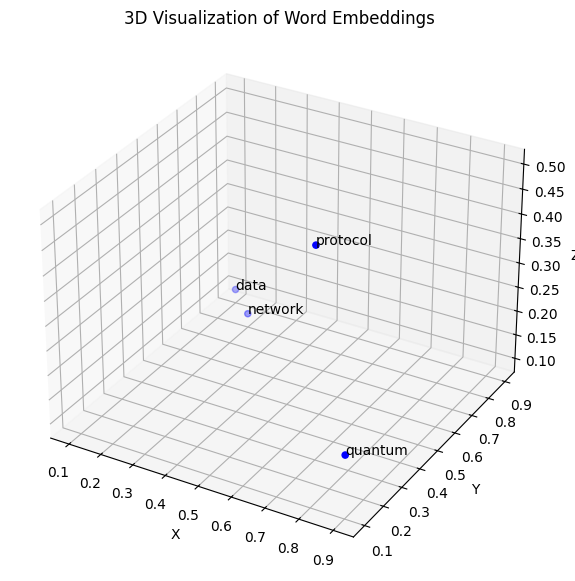

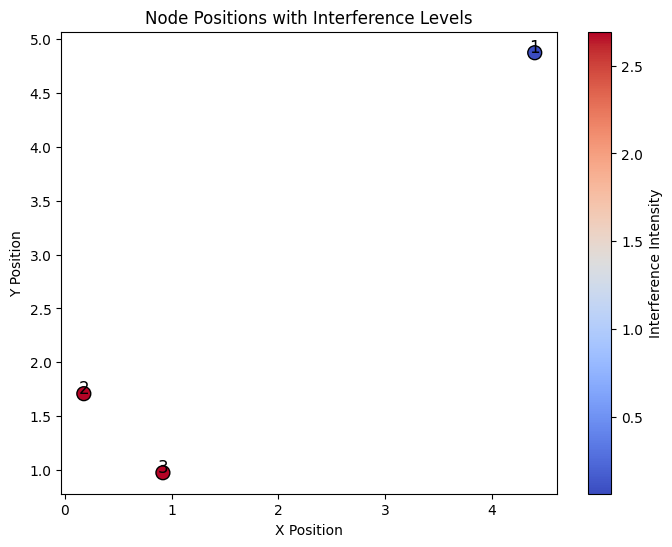

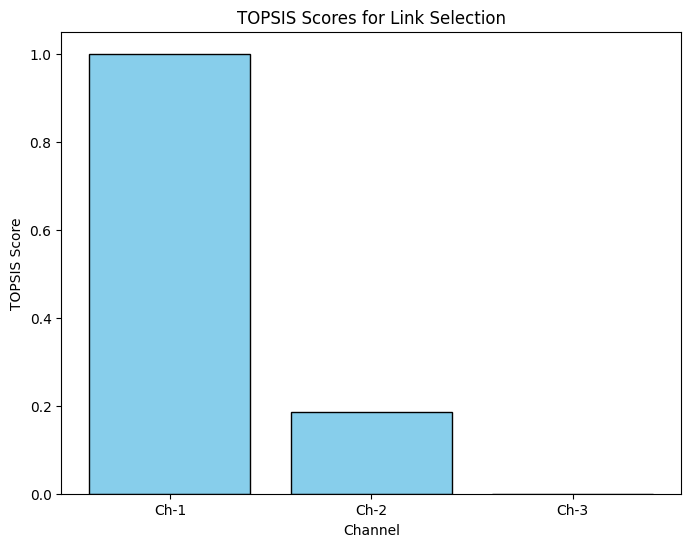


Fidelity with original state: 0.9531


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_city
from qiskit.quantum_info import Statevector, DensityMatrix
from sklearn.metrics.pairwise import cosine_similarity

# ==========================
# 1. Quantum Semantic Encoder
# ==========================
class QuantumSemanticEncoder:
    def __init__(self, word_embeddings):
        self.words = list(word_embeddings.keys())
        self.embeddings = np.array(list(word_embeddings.values()))
        # Number of qubits should match the size of each embedding vector
        self.num_qubits = len(self.embeddings[0])  # Set qubits to match the embedding size
        self.normalized_embeddings = self.embeddings / np.linalg.norm(self.embeddings, axis=1, keepdims=True)

    def encode_word(self, word):
        if word not in self.words:
            raise ValueError(f"Word '{word}' not found in vocabulary.")
        idx = self.words.index(word)
        embedding = self.normalized_embeddings[idx]
        state = np.zeros(2 ** self.num_qubits, dtype=complex)
        state[:len(embedding)] = embedding
        return Statevector(state)

    def plot_embeddings(self):
        """Visualize word embeddings in 3D."""
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(self.embeddings[:, 0], self.embeddings[:, 1], self.embeddings[:, 2], color='b', label='Embeddings')
        for i, word in enumerate(self.words):
            ax.text(self.embeddings[i, 0], self.embeddings[i, 1], self.embeddings[i, 2], word)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title("3D Visualization of Word Embeddings")
        plt.show()

    def draw_circuit(self, word):
        """Draw the quantum circuit for encoding the word."""
        if word not in self.words:
            raise ValueError(f"Word '{word}' not found in vocabulary.")
        idx = self.words.index(word)
        embedding = self.normalized_embeddings[idx]

        # Ensure the number of qubits matches the embedding size
        qc = QuantumCircuit(self.num_qubits)
        for i in range(len(embedding)):
            # Apply Ry rotation based on embedding values
            angle = 2 * np.arccos(embedding[i])  # Ensure angle stays within valid range
            qc.ry(angle, i)  # Apply the rotation to each qubit based on the embedding value
        qc.measure_all()
        return qc

# ==========================
# 2. Quantum Stochastic Geometry (QSG)
# ==========================
def generate_node_positions(num_nodes, area_size):
    return np.random.rand(num_nodes, 2) * area_size

def compute_interference(receiver_pos, node_positions, decay_factor=2.0):
    distances = np.linalg.norm(node_positions - receiver_pos, axis=1)
    distances[distances == 0] = 1e-9  # prevent division by zero
    return np.sum(1 / (distances ** decay_factor))

def plot_interference(nodes, interference_values):
    """Visualize node positions and interference."""
    plt.figure(figsize=(8, 6))
    plt.scatter(nodes[:, 0], nodes[:, 1], c=interference_values, cmap='coolwarm', s=100, edgecolors='k')
    for i, (x, y) in enumerate(nodes):
        plt.text(x, y, f'{i+1}', fontsize=12, ha='center')
    plt.colorbar(label='Interference Intensity')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title("Node Positions with Interference Levels")
    plt.show()

# ==========================
# 3. Quantum Channel with Interference
# ==========================
class QuantumChannel:
    def __init__(self, noise_level, position):
        self.noise_level = noise_level
        self.position = position
        self.interference = 0  # will be updated based on QSG

    def transmit(self, statevector):
        rho = np.outer(statevector.data, statevector.data.conj())
        dim = 2 ** statevector.num_qubits
        noisy_rho = (1 - self.noise_level) * rho + (self.noise_level / dim) * np.eye(dim)
        return DensityMatrix(noisy_rho)

# ==========================
# 4. TOPSIS for Link Selection
# ==========================
class TopsisSelector:
    def __init__(self, channels):
        self.channels = channels

    def normalize_matrix(self, matrix):
        norm = np.linalg.norm(matrix, axis=0)
        return matrix / norm

    def topsis_score(self, decision_matrix, weights):
        norm_matrix = self.normalize_matrix(decision_matrix)
        weighted_matrix = norm_matrix * weights
        ideal_best = np.max(weighted_matrix, axis=0)
        ideal_worst = np.min(weighted_matrix, axis=0)
        dist_best = np.linalg.norm(weighted_matrix - ideal_best, axis=1)
        dist_worst = np.linalg.norm(weighted_matrix - ideal_worst, axis=1)
        return dist_worst / (dist_best + dist_worst)

    def select_best_channel(self, semantic_importance):
        # Build decision matrix: [1-noise, 1-interference, semantic importance]
        matrix = []
        for ch in self.channels:
            matrix.append([
                1 - ch.noise_level,
                1 / (1 + ch.interference),  # lower interference → higher score
                semantic_importance
            ])
        matrix = np.array(matrix)
        weights = np.array([0.4, 0.4, 0.2])  # can adjust or compute via FAHP
        scores = self.topsis_score(matrix, weights)
        best_index = np.argmax(scores)
        return self.channels[best_index], scores

    def plot_topsis_scores(self, scores):
        """Plot the TOPSIS scores as a bar chart."""
        plt.figure(figsize=(8, 6))
        plt.bar(range(len(scores)), scores, color='skyblue', edgecolor='black')
        plt.xlabel('Channel')
        plt.ylabel('TOPSIS Score')
        plt.title('TOPSIS Scores for Link Selection')
        plt.xticks(range(len(scores)), [f'Ch-{i+1}' for i in range(len(scores))])
        plt.show()

# ==========================
# 5. Fidelity Calculation
# ==========================
def calculate_fidelity(statevector, density_matrix):
    psi = statevector.data
    rho = density_matrix.data
    return np.vdot(psi, rho @ psi).real

# ==========================
# 6. Example Simulation with Visualizations
# ==========================
if __name__ == "__main__":
    # === Word Embeddings ===
    embeddings = {
        "quantum": [0.9, 0.1, 0.2, 0.3],
        "network": [0.2, 0.8, 0.1, 0.1],
        "protocol": [0.7, 0.3, 0.5, 0.2],
        "data": [0.1, 0.9, 0.1, 0.3]
    }
    encoder = QuantumSemanticEncoder(embeddings)

    # === Generate Channels with QSG ===
    area_size = 10
    num_channels = 3
    receiver_position = np.array([5.0, 5.0])
    channel_positions = generate_node_positions(num_channels, area_size)
    noise_levels = [0.05, 0.3, 0.5]

    channels = []
    for i in range(num_channels):
        ch = QuantumChannel(noise_levels[i], channel_positions[i])
        ch.interference = compute_interference(receiver_position, np.delete(channel_positions, i, axis=0))
        channels.append(ch)

    # === Select Word and Importance ===
    word = "quantum"
    importance = 0.9

    # === Encode and Select Best Channel ===
    encoded = encoder.encode_word(word)
    selector = TopsisSelector(channels)
    best_channel, scores = selector.select_best_channel(importance)

    print("\nTOPSIS Scores:", scores)
    print("Selected channel:")
    print(f"  Noise: {best_channel.noise_level}")
    print(f"  Interference: {best_channel.interference:.4f}")
    print(f"  Position: {best_channel.position}")

    # === Visualizations ===
    encoder.plot_embeddings()
    plot_interference(channel_positions, [ch.interference for ch in channels])
    selector.plot_topsis_scores(scores)

    # === Draw the Quantum Circuit ===
    qc = encoder.draw_circuit(word)
    qc.draw('mpl')  # Draw the quantum circuit

    # === Transmit and Evaluate Fidelity ===
    received = best_channel.transmit(encoded)
    fidelity = calculate_fidelity(encoded, received)
    print(f"\nFidelity with original state: {fidelity:.4f}")


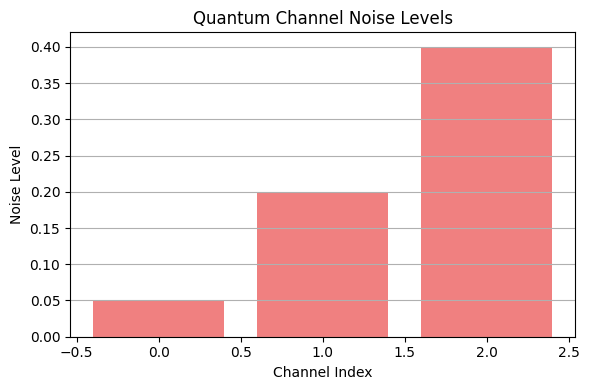

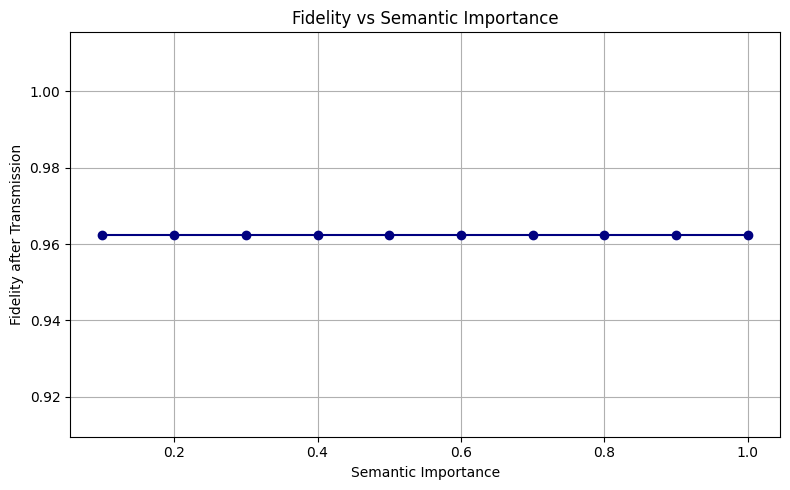

In [18]:
# ==========================================================
# Quantum Semantic Communications Framework (Research-Grade)
# ==========================================================

import numpy as np
import matplotlib.pyplot as plt
import logging
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, DensityMatrix
from typing import List, Dict

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# ========================
# Configuration
# ========================

EMBEDDING_DIM = 4  # Match the dimension to the size of given embeddings

# ========================
# 1. Quantum Semantic Encoder
# ========================

class QuantumSemanticEncoder:
    """
    Encodes classical semantic word embeddings into quantum statevectors.
    """
    def __init__(self, word_embeddings: Dict[str, List[float]]):
        self.words = list(word_embeddings.keys())
        self.embeddings = np.array(list(word_embeddings.values()))
        self.num_qubits = int(np.ceil(np.log2(EMBEDDING_DIM)))
        self._validate_dimensions()
        self.normalized_embeddings = self._normalize_embeddings()

    def _validate_dimensions(self) -> None:
        if not all(len(vec) == EMBEDDING_DIM for vec in self.embeddings):
            raise ValueError(f"All embeddings must have dimension {EMBEDDING_DIM}.")

    def _normalize_embeddings(self) -> np.ndarray:
        norms = np.linalg.norm(self.embeddings, axis=1, keepdims=True)
        return self.embeddings / norms

    def encode_word(self, word: str) -> Statevector:
        """
        Returns the quantum statevector corresponding to a given word.
        """
        if word not in self.words:
            raise ValueError(f"Word '{word}' not found in vocabulary.")

        idx = self.words.index(word)
        emb = self.normalized_embeddings[idx]

        # Expand to full statevector
        state = np.zeros(2**self.num_qubits, dtype=complex)
        state[:len(emb)] = emb

        # Normalize again to ensure valid quantum state
        norm = np.linalg.norm(state)
        return Statevector(state / norm)

    def draw_circuit(self, word: str) -> QuantumCircuit:
        """
        Draws a quantum circuit initializing the word's quantum state.
        """
        qc = QuantumCircuit(self.num_qubits)
        statevector = self.encode_word(word)
        qc.initialize(statevector.data, qc.qubits)
        return qc

# ========================
# 2. Quantum Channel Model
# ========================

class QuantumChannel:
    """
    Models a simple noisy quantum channel using depolarizing noise.
    """
    def __init__(self, noise_level: float = 0.1):
        if not (0 <= noise_level <= 1):
            raise ValueError("Noise level must be between 0 and 1.")
        self.noise_level = noise_level

    def transmit(self, statevector: Statevector) -> DensityMatrix:
        """
        Simulates transmission through a depolarizing noisy channel.
        """
        pure_rho = np.outer(statevector.data, statevector.data.conj())
        dim = len(statevector.data)
        noisy_rho = (1 - self.noise_level) * pure_rho + (self.noise_level / dim) * np.eye(dim)
        return DensityMatrix(noisy_rho)

# ========================
# 3. Link Selector (Simple MCDM)
# ========================

class LinkSelector:
    """
    Selects the best transmission channel based on semantic importance.
    """
    def __init__(self, channels: List[QuantumChannel]):
        self.channels = channels

    def select_best_channel(self, semantic_importance: float) -> QuantumChannel:
        """
        Scores channels by (1 - noise_level) × semantic_importance.
        """
        scores = [(1 - ch.noise_level) * semantic_importance for ch in self.channels]
        best_idx = np.argmax(scores)
        return self.channels[best_idx]

# ========================
# 4. Fidelity Calculation
# ========================

def calculate_fidelity(statevector: Statevector, density_matrix: DensityMatrix) -> float:
    """
    Calculates the fidelity F = ⟨ψ|ρ|ψ⟩ between a pure statevector and a density matrix.
    """
    psi = statevector.data
    rho = density_matrix.data
    return np.real(np.vdot(psi, rho @ psi))

# ========================
# 5. Plotting Utilities
# ========================

def plot_fidelity_vs_importance(importances: np.ndarray, fidelities: np.ndarray) -> None:
    """
    Plots fidelity vs semantic importance.
    """
    plt.figure(figsize=(8,5))
    plt.plot(importances, fidelities, marker='o', color='navy')
    plt.title("Fidelity vs Semantic Importance")
    plt.xlabel("Semantic Importance")
    plt.ylabel("Fidelity after Transmission")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_channel_noise(channels: List[QuantumChannel]) -> None:
    """
    Plots the noise levels of available channels.
    """
    noise_levels = [ch.noise_level for ch in channels]
    plt.figure(figsize=(6,4))
    plt.bar(range(len(noise_levels)), noise_levels, color='lightcoral')
    plt.title("Quantum Channel Noise Levels")
    plt.xlabel("Channel Index")
    plt.ylabel("Noise Level")
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

# ========================
# 6. Main Simulation
# ========================

def main() -> None:
    # Define vocabulary and embeddings
    embeddings = {
        "quantum": [0.9, 0.1, 0.2, 0.3],
        "network": [0.2, 0.8, 0.1, 0.1],
        "protocol": [0.7, 0.3, 0.5, 0.2],
        "data": [0.1, 0.9, 0.1, 0.3]
    }

    encoder = QuantumSemanticEncoder(embeddings)

    channels = [
        QuantumChannel(noise_level=0.05),
        QuantumChannel(noise_level=0.2),
        QuantumChannel(noise_level=0.4)
    ]
    selector = LinkSelector(channels)

    word = "quantum"
    importance = 0.9

    # Plot available channels
    plot_channel_noise(channels)

    # Draw quantum circuit
    qc = encoder.draw_circuit(word)
    logging.info(f"Drawing quantum circuit for the word '{word}'.")
    qc.draw('mpl')
    plt.show()

    # Encode and transmit
    statevector = encoder.encode_word(word)
    best_channel = selector.select_best_channel(importance)
    received_rho = best_channel.transmit(statevector)

    # Fidelity
    fidelity = calculate_fidelity(statevector, received_rho)
    logging.info(f"Fidelity after transmission: {fidelity:.4f}")

    # Fidelity vs Importance
    importances = np.linspace(0.1, 1.0, 10)
    fidelities = []

    for imp in importances:
        channel = selector.select_best_channel(imp)
        received_rho = channel.transmit(statevector)
        fid = calculate_fidelity(statevector, received_rho)
        fidelities.append(fid)

    plot_fidelity_vs_importance(importances, np.array(fidelities))

# Run simulation
if __name__ == "__main__":
    main()


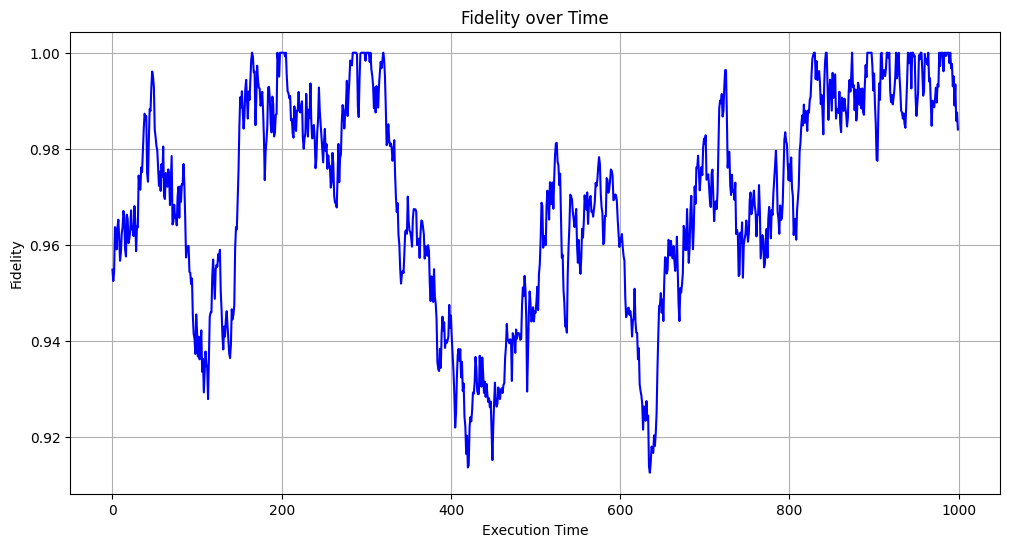

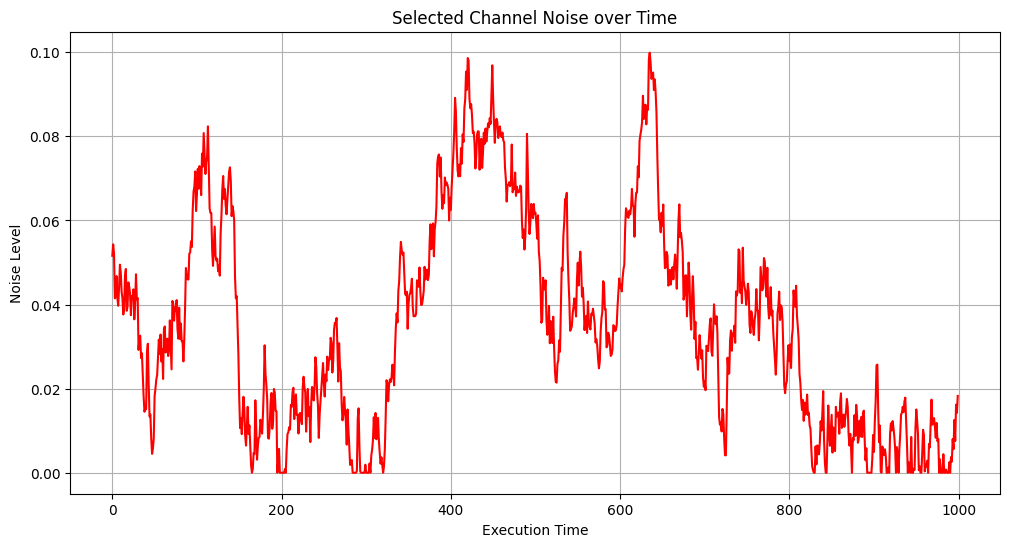

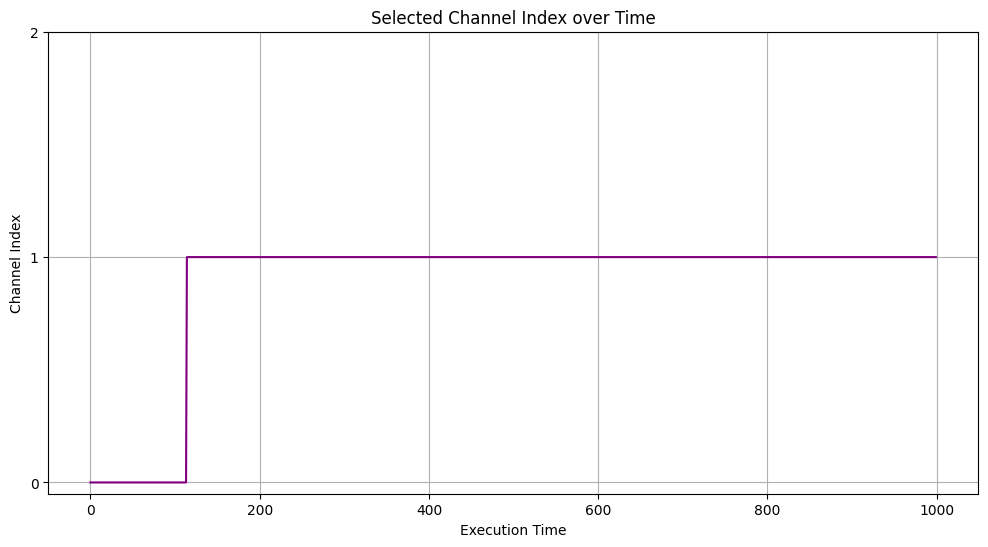

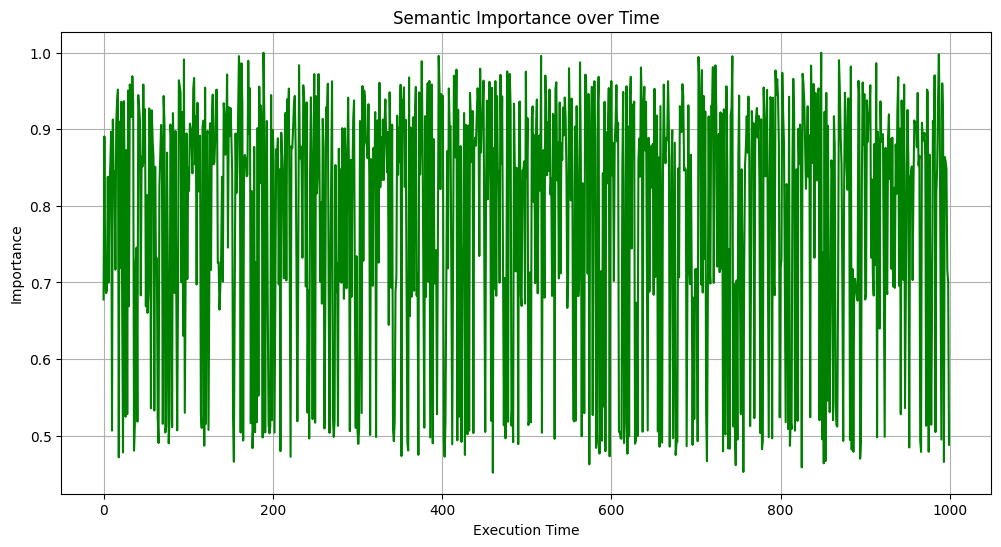

In [17]:
 import numpy as np
import matplotlib.pyplot as plt
import logging
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, DensityMatrix
from typing import List, Dict

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

EMBEDDING_DIM = 4

class QuantumSemanticEncoder:
    def __init__(self, word_embeddings: Dict[str, List[float]]):
        self.words = list(word_embeddings.keys())
        self.embeddings = np.array(list(word_embeddings.values()))
        self.num_qubits = int(np.ceil(np.log2(len(self.words))))
        self.normalized_embeddings = self._normalize_embeddings()

    def _normalize_embeddings(self) -> np.ndarray:
        norms = np.linalg.norm(self.embeddings, axis=1, keepdims=True)
        return self.embeddings / norms

    def encode_word(self, word: str) -> Statevector:
        if word not in self.words:
            raise ValueError(f"Word '{word}' not found in vocabulary.")
        idx = self.words.index(word)
        emb = self.normalized_embeddings[idx]
        state = np.zeros(2**self.num_qubits, dtype=complex)
        state[:len(emb)] = emb
        return Statevector(state)

class QuantumChannel:
    def __init__(self, noise_level: float = 0.1):
        self.noise_level = noise_level

    def transmit(self, statevector: Statevector) -> DensityMatrix:
        pure_rho = np.outer(statevector.data, statevector.data.conj())
        dim = len(statevector.data)
        noisy_rho = (1 - self.noise_level) * pure_rho + (self.noise_level / dim) * np.eye(dim)
        return DensityMatrix(noisy_rho)

class LinkSelector:
    def __init__(self, channels: List[QuantumChannel]):
        self.channels = channels

    def select_best_channel(self, semantic_importance: float) -> int:
        scores = [(1 - ch.noise_level) * semantic_importance for ch in self.channels]
        best_idx = np.argmax(scores)
        return best_idx

def calculate_fidelity(statevector: Statevector, density_matrix: DensityMatrix) -> float:
    psi = statevector.data
    rho = density_matrix.data
    return np.real(np.vdot(psi, rho @ psi))

def main():
    np.random.seed(42)

    embeddings = {
        "quantum": [0.9, 0.1, 0.2, 0.3],
        "network": [0.2, 0.8, 0.1, 0.1],
        "security": [0.7, 0.1, 0.6, 0.2],
        "data": [0.1, 0.9, 0.1, 0.3],
        "error": [0.6, 0.4, 0.3, 0.5]
    }

    base_importance = {
        "quantum": 0.95,
        "network": 0.85,
        "security": 0.9,
        "data": 0.7,
        "error": 0.5
    }

    encoder = QuantumSemanticEncoder(embeddings)
    channels = [
        QuantumChannel(noise_level=0.05),
        QuantumChannel(noise_level=0.15),
        QuantumChannel(noise_level=0.4)
    ]
    selector = LinkSelector(channels)

    execution_steps = 1000
    fidelities = []
    channel_noise_over_time = []
    selected_channel_over_time = []
    importance_over_time = []

    words = list(embeddings.keys())

    for t in range(execution_steps):
        current_word = np.random.choice(words)
        true_importance = base_importance[current_word] + np.random.normal(0, 0.02)
        true_importance = np.clip(true_importance, 0, 1)

        statevector = encoder.encode_word(current_word)

        for ch in channels:
            noise_fluctuation = np.random.normal(0, 0.005)
            ch.noise_level = np.clip(ch.noise_level + noise_fluctuation, 0, 1)

        best_idx = selector.select_best_channel(true_importance)
        best_channel = channels[best_idx]
        received_rho = best_channel.transmit(statevector)
        fidelity = calculate_fidelity(statevector, received_rho)

        fidelities.append(fidelity)
        channel_noise_over_time.append(best_channel.noise_level)
        selected_channel_over_time.append(best_idx)
        importance_over_time.append(true_importance)

    time = np.arange(execution_steps)

    plt.figure(figsize=(12, 6))
    plt.plot(time, fidelities, color='blue')
    plt.title("Fidelity over Time")
    plt.xlabel("Execution Time")
    plt.ylabel("Fidelity")
    plt.grid()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(time, channel_noise_over_time, color='red')
    plt.title("Selected Channel Noise over Time")
    plt.xlabel("Execution Time")
    plt.ylabel("Noise Level")
    plt.grid()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(time, selected_channel_over_time, color='purple')
    plt.title("Selected Channel Index over Time")
    plt.xlabel("Execution Time")
    plt.ylabel("Channel Index")
    plt.yticks([0, 1, 2])
    plt.grid()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(time, importance_over_time, color='green')
    plt.title("Semantic Importance over Time")
    plt.xlabel("Execution Time")
    plt.ylabel("Importance")
    plt.grid()
    plt.show()

if __name__ == "__main__":
    main()


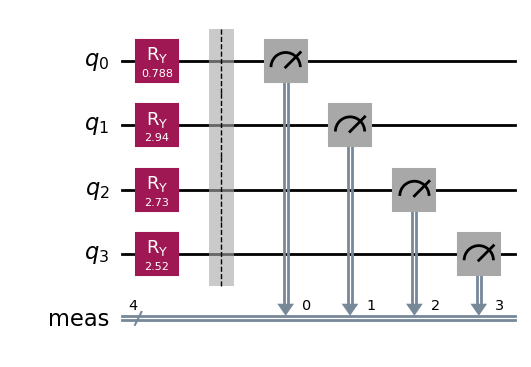

In [19]:
qc.draw('mpl')

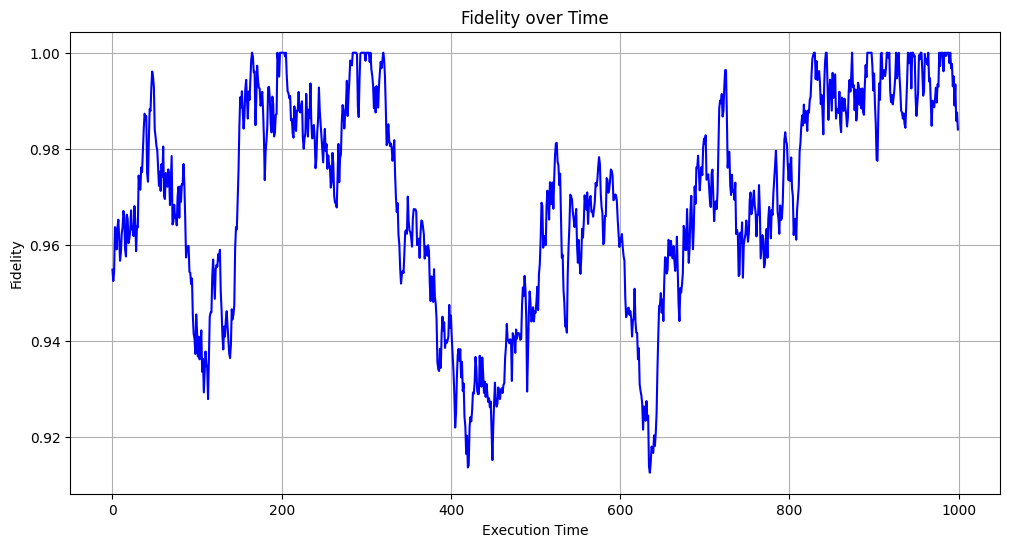

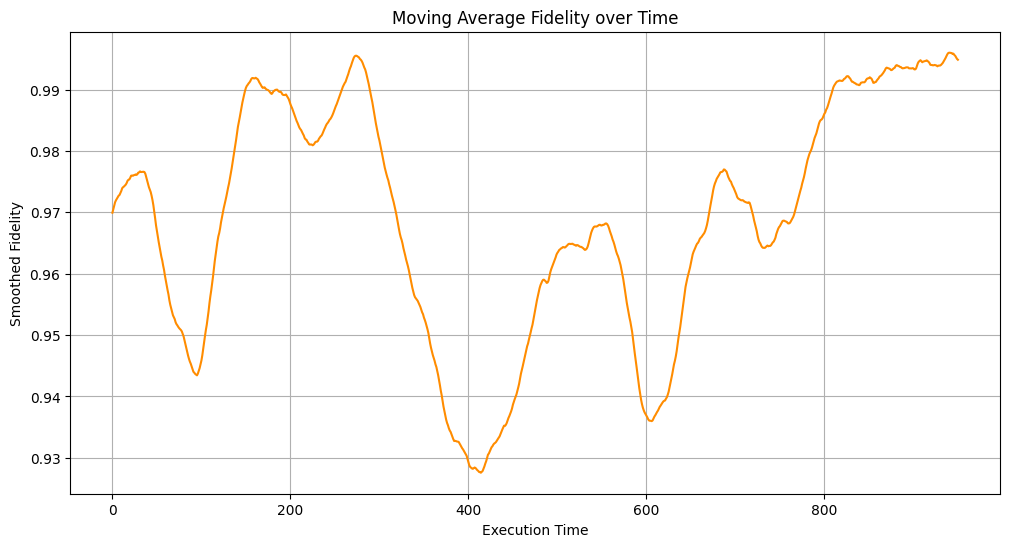

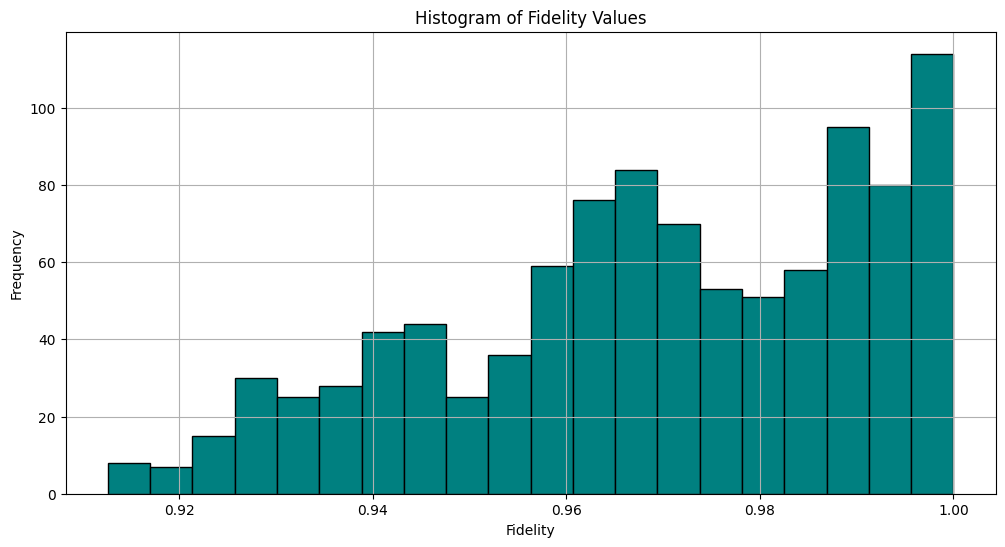

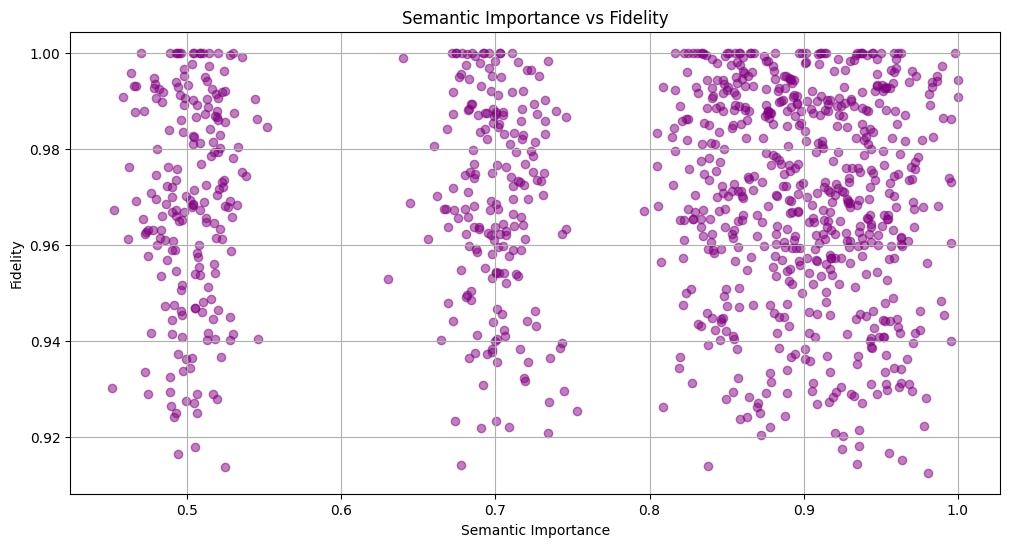

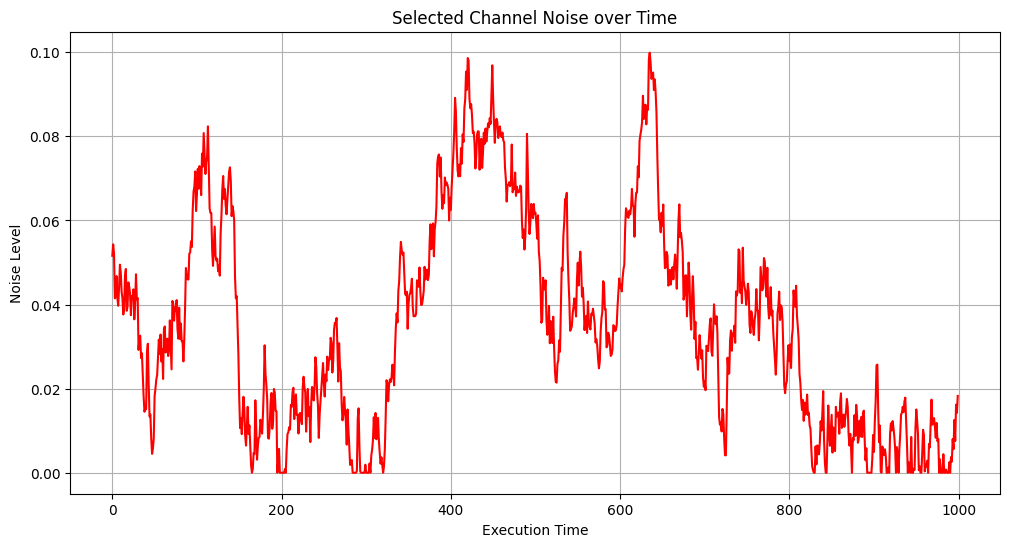

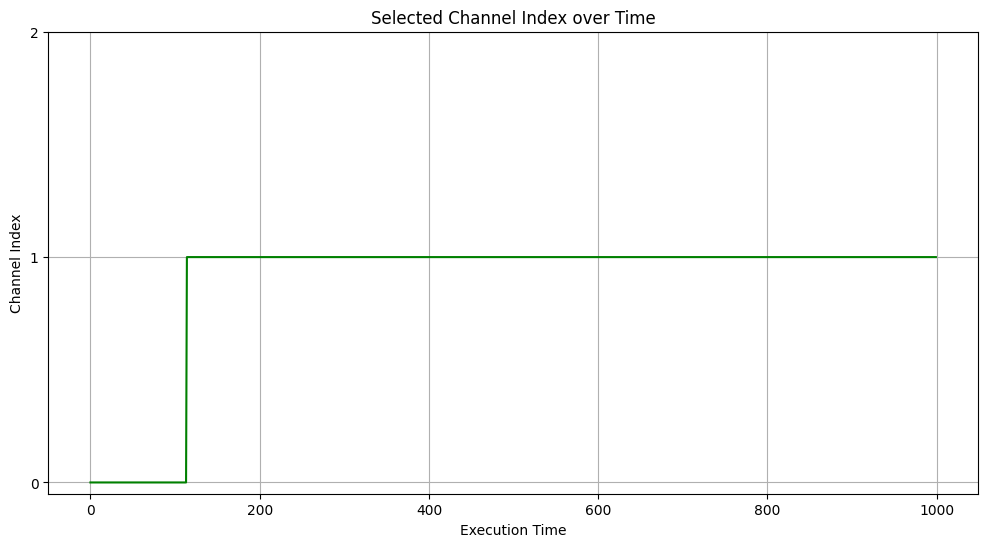

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import logging
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, DensityMatrix
from typing import List, Dict

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

EMBEDDING_DIM = 4

class QuantumSemanticEncoder:
    def __init__(self, word_embeddings: Dict[str, List[float]]):
        self.words = list(word_embeddings.keys())
        self.embeddings = np.array(list(word_embeddings.values()))
        self.num_qubits = int(np.ceil(np.log2(len(self.words))))
        self.normalized_embeddings = self._normalize_embeddings()

    def _normalize_embeddings(self) -> np.ndarray:
        norms = np.linalg.norm(self.embeddings, axis=1, keepdims=True)
        return self.embeddings / norms

    def encode_word(self, word: str) -> Statevector:
        if word not in self.words:
            raise ValueError(f"Word '{word}' not found in vocabulary.")
        idx = self.words.index(word)
        emb = self.normalized_embeddings[idx]
        state = np.zeros(2**self.num_qubits, dtype=complex)
        state[:len(emb)] = emb
        return Statevector(state)

class QuantumChannel:
    def __init__(self, noise_level: float = 0.1):
        self.noise_level = noise_level

    def transmit(self, statevector: Statevector) -> DensityMatrix:
        pure_rho = np.outer(statevector.data, statevector.data.conj())
        dim = len(statevector.data)
        noisy_rho = (1 - self.noise_level) * pure_rho + (self.noise_level / dim) * np.eye(dim)
        return DensityMatrix(noisy_rho)

class LinkSelector:
    def __init__(self, channels: List[QuantumChannel]):
        self.channels = channels

    def select_best_channel(self, semantic_importance: float) -> int:
        scores = [(1 - ch.noise_level) * semantic_importance for ch in self.channels]
        best_idx = np.argmax(scores)
        return best_idx

def calculate_fidelity(statevector: Statevector, density_matrix: DensityMatrix) -> float:
    psi = statevector.data
    rho = density_matrix.data
    return np.real(np.vdot(psi, rho @ psi))

def moving_average(arr: np.ndarray, window_size: int = 50) -> np.ndarray:
    return np.convolve(arr, np.ones(window_size)/window_size, mode='valid')

def main():
    np.random.seed(42)

    embeddings = {
        "quantum": [0.9, 0.1, 0.2, 0.3],
        "network": [0.2, 0.8, 0.1, 0.1],
        "security": [0.7, 0.1, 0.6, 0.2],
        "data": [0.1, 0.9, 0.1, 0.3],
        "error": [0.6, 0.4, 0.3, 0.5]
    }

    base_importance = {
        "quantum": 0.95,
        "network": 0.85,
        "security": 0.9,
        "data": 0.7,
        "error": 0.5
    }

    encoder = QuantumSemanticEncoder(embeddings)

    channels = [
        QuantumChannel(noise_level=0.05),
        QuantumChannel(noise_level=0.15),
        QuantumChannel(noise_level=0.4)
    ]
    selector = LinkSelector(channels)

    execution_steps = 1000
    fidelities = []
    channel_noise_over_time = []
    selected_channel_over_time = []
    importance_over_time = []

    words = list(embeddings.keys())

    for t in range(execution_steps):
        current_word = np.random.choice(words)
        true_importance = base_importance[current_word] + np.random.normal(0, 0.02)
        true_importance = np.clip(true_importance, 0, 1)

        statevector = encoder.encode_word(current_word)

        for ch in channels:
            noise_fluctuation = np.random.normal(0, 0.005)
            ch.noise_level = np.clip(ch.noise_level + noise_fluctuation, 0, 1)

        best_idx = selector.select_best_channel(true_importance)
        best_channel = channels[best_idx]
        received_rho = best_channel.transmit(statevector)

        fidelity = calculate_fidelity(statevector, received_rho)

        fidelities.append(fidelity)
        channel_noise_over_time.append(best_channel.noise_level)
        selected_channel_over_time.append(best_idx)
        importance_over_time.append(true_importance)

    time = np.arange(execution_steps)

    plt.figure(figsize=(12, 6))
    plt.plot(time, fidelities, color='blue')
    plt.title("Fidelity over Time")
    plt.xlabel("Execution Time")
    plt.ylabel("Fidelity")
    plt.grid()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(time[:len(moving_average(fidelities))], moving_average(fidelities), color='darkorange')
    plt.title("Moving Average Fidelity over Time")
    plt.xlabel("Execution Time")
    plt.ylabel("Smoothed Fidelity")
    plt.grid()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.hist(fidelities, bins=20, color='teal', edgecolor='black')
    plt.title("Histogram of Fidelity Values")
    plt.xlabel("Fidelity")
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.scatter(importance_over_time, fidelities, color='purple', alpha=0.5)
    plt.title("Semantic Importance vs Fidelity")
    plt.xlabel("Semantic Importance")
    plt.ylabel("Fidelity")
    plt.grid()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(time, channel_noise_over_time, color='red')
    plt.title("Selected Channel Noise over Time")
    plt.xlabel("Execution Time")
    plt.ylabel("Noise Level")
    plt.grid()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(time, selected_channel_over_time, color='green')
    plt.title("Selected Channel Index over Time")
    plt.xlabel("Execution Time")
    plt.ylabel("Channel Index")
    plt.yticks([0, 1, 2])
    plt.grid()
    plt.show()

    channel_switches = np.sum(np.diff(selected_channel_over_time) != 0)
    logging.info(f"Total Channel Switches during simulation: {channel_switches}")

if __name__ == "__main__":
    main()


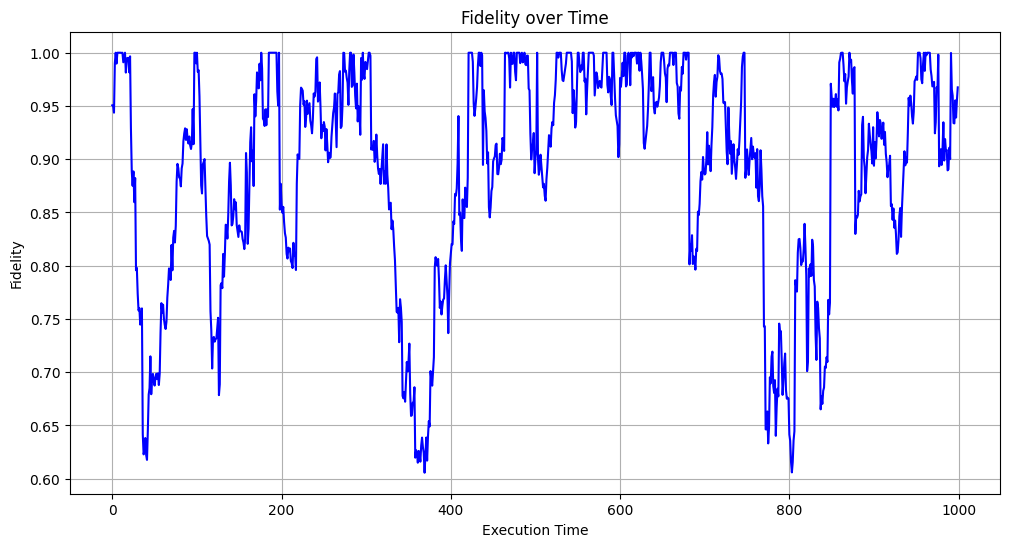

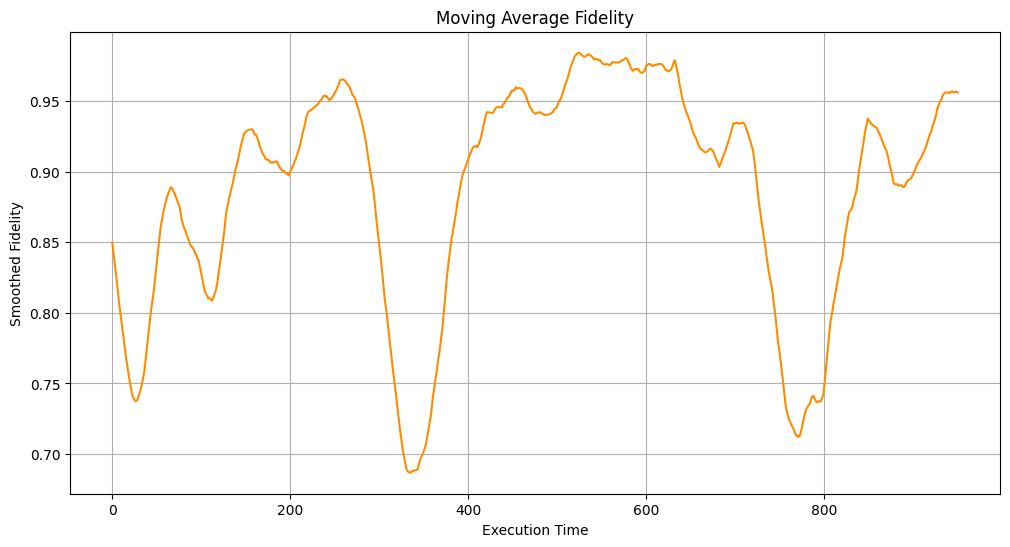

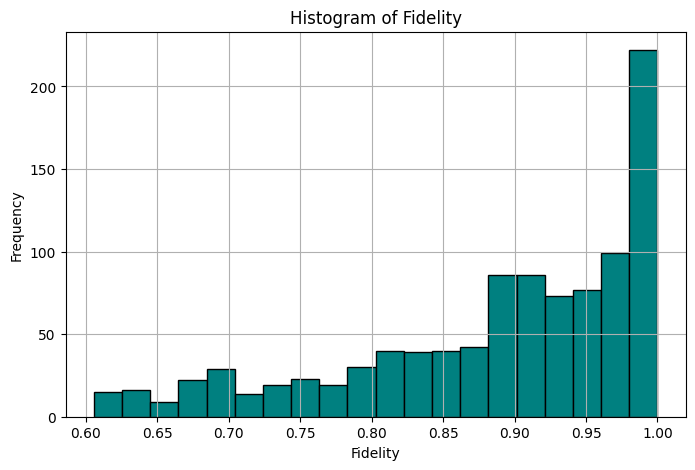

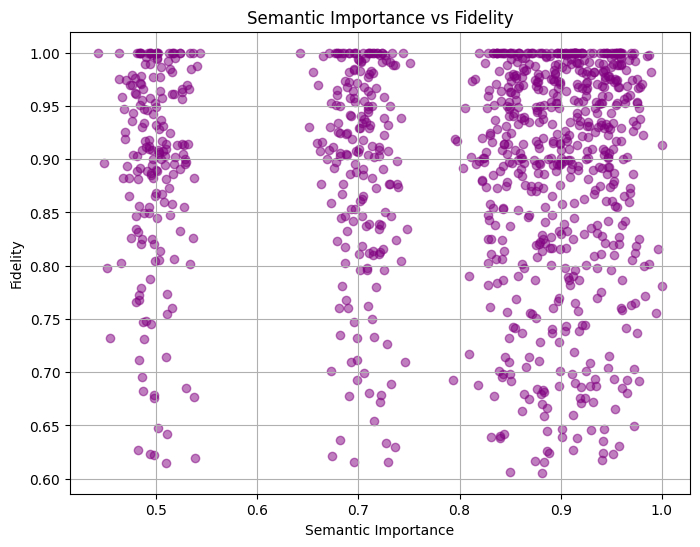

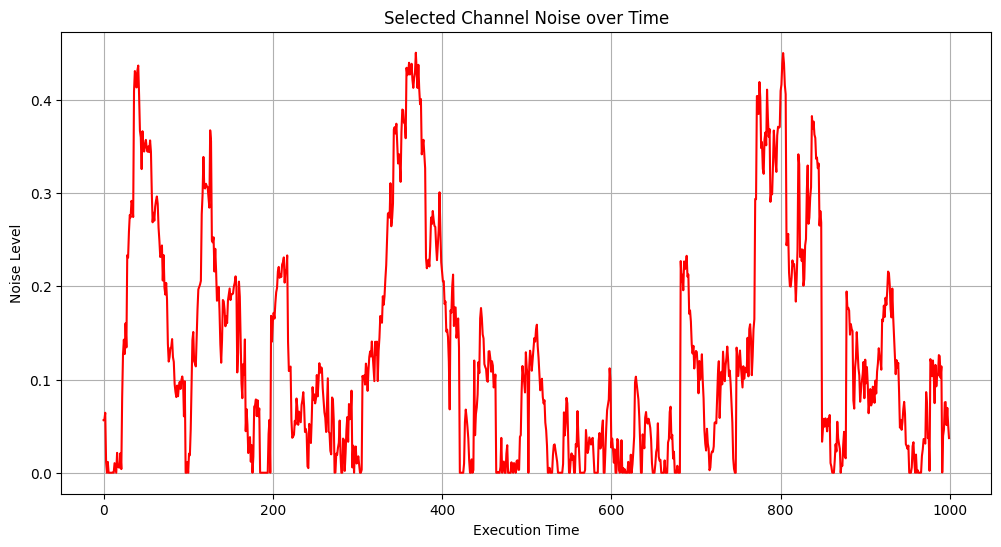

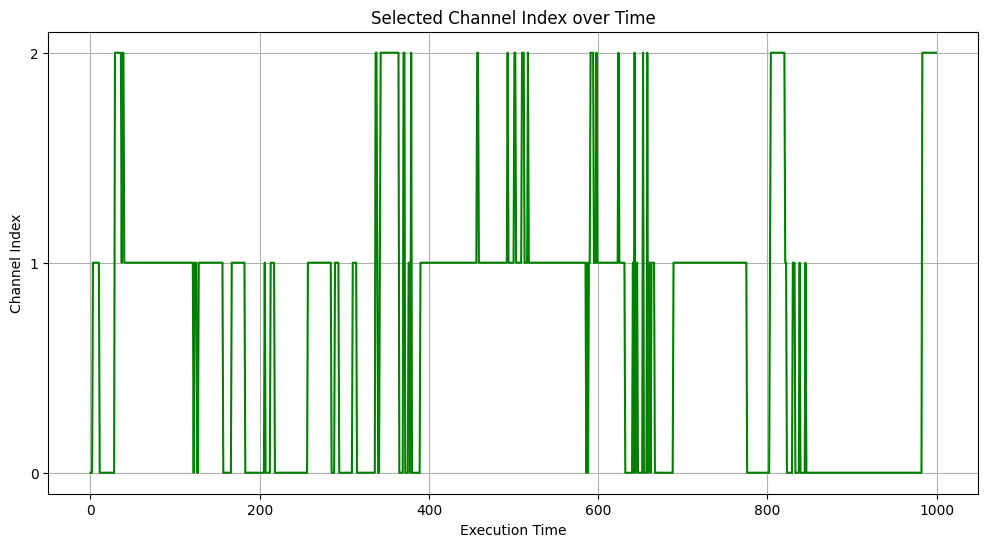

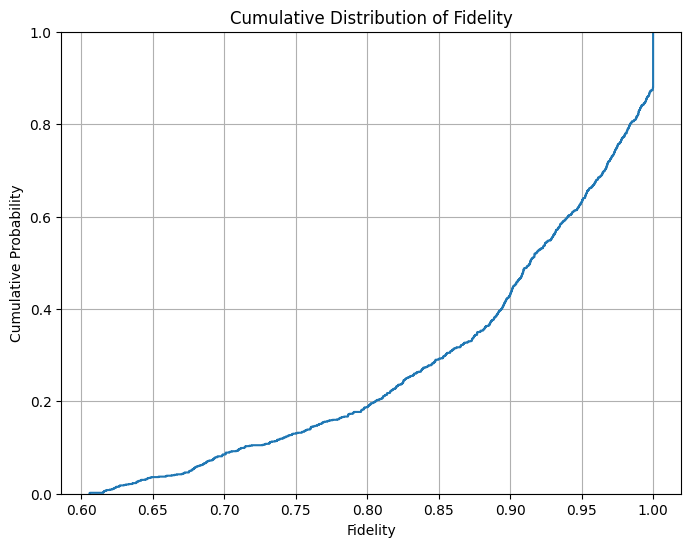

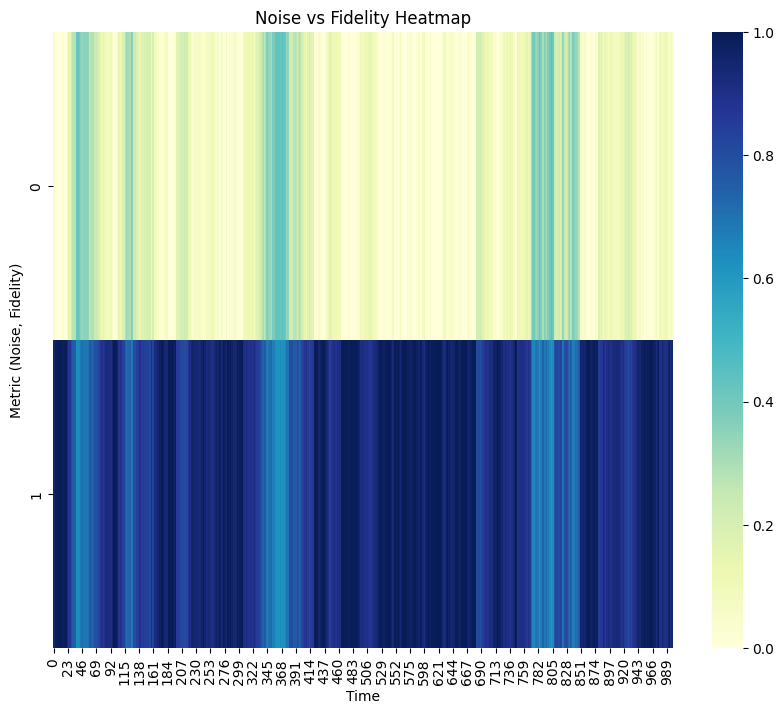

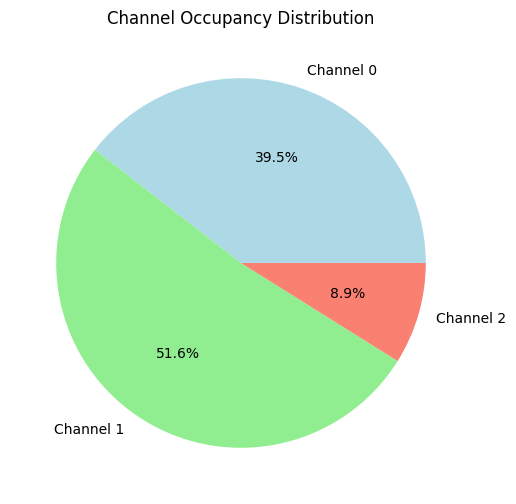

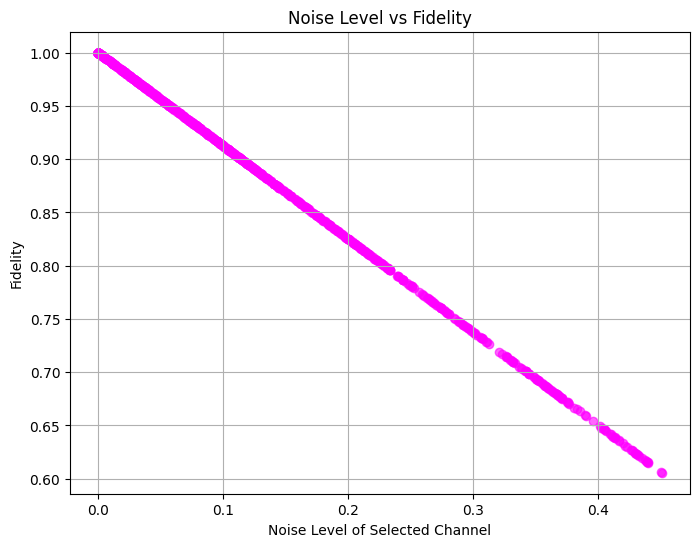

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, DensityMatrix
from typing import List, Dict

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

EMBEDDING_DIM = 4

class QuantumSemanticEncoder:
    def __init__(self, word_embeddings: Dict[str, List[float]]):
        self.words = list(word_embeddings.keys())
        self.embeddings = np.array(list(word_embeddings.values()))
        self.num_qubits = int(np.ceil(np.log2(len(self.words))))
        self.normalized_embeddings = self._normalize_embeddings()

    def _normalize_embeddings(self) -> np.ndarray:
        norms = np.linalg.norm(self.embeddings, axis=1, keepdims=True)
        return self.embeddings / norms

    def encode_word(self, word: str) -> Statevector:
        if word not in self.words:
            raise ValueError(f"Word '{word}' not found in vocabulary.")
        idx = self.words.index(word)
        emb = self.normalized_embeddings[idx]
        state = np.zeros(2**self.num_qubits, dtype=complex)
        state[:len(emb)] = emb
        return Statevector(state)

class QuantumChannel:
    def __init__(self, noise_level: float = 0.1):
        self.noise_level = noise_level

    def transmit(self, statevector: Statevector) -> DensityMatrix:
        pure_rho = np.outer(statevector.data, statevector.data.conj())
        dim = len(statevector.data)
        noisy_rho = (1 - self.noise_level) * pure_rho + (self.noise_level / dim) * np.eye(dim)
        return DensityMatrix(noisy_rho)

class LinkSelector:
    def __init__(self, channels: List[QuantumChannel]):
        self.channels = channels

    def select_best_channel(self, semantic_importance: float) -> int:
        scores = [(1 - ch.noise_level) * semantic_importance for ch in self.channels]
        best_idx = np.argmax(scores)
        return best_idx

def calculate_fidelity(statevector: Statevector, density_matrix: DensityMatrix) -> float:
    psi = statevector.data
    rho = density_matrix.data
    return np.real(np.vdot(psi, rho @ psi))

def moving_average(arr: np.ndarray, window_size: int = 50) -> np.ndarray:
    return np.convolve(arr, np.ones(window_size)/window_size, mode='valid')

def main():
    np.random.seed(42)

    embeddings = {
        "quantum": [0.9, 0.1, 0.2, 0.3],
        "network": [0.2, 0.8, 0.1, 0.1],
        "security": [0.7, 0.1, 0.6, 0.2],
        "data": [0.1, 0.9, 0.1, 0.3],
        "error": [0.6, 0.4, 0.3, 0.5]
    }

    base_importance = {
        "quantum": 0.95,
        "network": 0.85,
        "security": 0.9,
        "data": 0.7,
        "error": 0.5
    }

    encoder = QuantumSemanticEncoder(embeddings)
    channels = [
        QuantumChannel(noise_level=0.05),
        QuantumChannel(noise_level=0.15),
        QuantumChannel(noise_level=0.4)
    ]
    selector = LinkSelector(channels)

    execution_steps = 1000
    fidelities = []
    channel_noise_over_time = []
    selected_channel_over_time = []
    importance_over_time = []

    words = list(embeddings.keys())

    for t in range(execution_steps):
        current_word = np.random.choice(words)
        true_importance = base_importance[current_word] + np.random.normal(0, 0.02)
        true_importance = np.clip(true_importance, 0, 1)

        statevector = encoder.encode_word(current_word)

        for ch in channels:
            # Corrected Noise Update: random walk + sudden spike model
            noise_walk = np.random.normal(0, 0.02)
            noise_spike = np.random.choice([0, np.random.normal(0, 0.1)], p=[0.9, 0.1])
            ch.noise_level = np.clip(ch.noise_level + noise_walk + noise_spike, 0, 1)

        best_idx = selector.select_best_channel(true_importance)
        best_channel = channels[best_idx]
        received_rho = best_channel.transmit(statevector)

        fidelity = calculate_fidelity(statevector, received_rho)

        fidelities.append(fidelity)
        channel_noise_over_time.append(best_channel.noise_level)
        selected_channel_over_time.append(best_idx)
        importance_over_time.append(true_importance)

    time = np.arange(execution_steps)

    plt.figure(figsize=(12, 6))
    plt.plot(time, fidelities, color='blue')
    plt.title("Fidelity over Time")
    plt.xlabel("Execution Time")
    plt.ylabel("Fidelity")
    plt.grid()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(time[:len(moving_average(fidelities))], moving_average(fidelities), color='darkorange')
    plt.title("Moving Average Fidelity")
    plt.xlabel("Execution Time")
    plt.ylabel("Smoothed Fidelity")
    plt.grid()
    plt.show()

    plt.figure(figsize=(8, 5))
    plt.hist(fidelities, bins=20, color='teal', edgecolor='black')
    plt.title("Histogram of Fidelity")
    plt.xlabel("Fidelity")
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.scatter(importance_over_time, fidelities, color='purple', alpha=0.5)
    plt.title("Semantic Importance vs Fidelity")
    plt.xlabel("Semantic Importance")
    plt.ylabel("Fidelity")
    plt.grid()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(time, channel_noise_over_time, color='red')
    plt.title("Selected Channel Noise over Time")
    plt.xlabel("Execution Time")
    plt.ylabel("Noise Level")
    plt.grid()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(time, selected_channel_over_time, color='green')
    plt.title("Selected Channel Index over Time")
    plt.xlabel("Execution Time")
    plt.ylabel("Channel Index")
    plt.yticks([0, 1, 2])
    plt.grid()
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.ecdfplot(fidelities)
    plt.title("Cumulative Distribution of Fidelity")
    plt.xlabel("Fidelity")
    plt.ylabel("Cumulative Probability")
    plt.grid()
    plt.show()

    plt.figure(figsize=(10, 8))
    sns.heatmap(np.vstack([channel_noise_over_time, fidelities]), cmap="YlGnBu", cbar=True)
    plt.title("Noise vs Fidelity Heatmap")
    plt.xlabel("Time")
    plt.ylabel("Metric (Noise, Fidelity)")
    plt.show()

    plt.figure(figsize=(8, 6))
    counts = [selected_channel_over_time.count(i) for i in range(3)]
    plt.pie(counts, labels=['Channel 0', 'Channel 1', 'Channel 2'], autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'salmon'])
    plt.title("Channel Occupancy Distribution")
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.scatter(channel_noise_over_time, fidelities, color='magenta', alpha=0.6)
    plt.title("Noise Level vs Fidelity")
    plt.xlabel("Noise Level of Selected Channel")
    plt.ylabel("Fidelity")
    plt.grid()
    plt.show()

    channel_switches = np.sum(np.diff(selected_channel_over_time) != 0)
    logging.info(f"Total Channel Switches: {channel_switches}")

if __name__ == "__main__":
    main()


In [14]:
def main():
    np.random.seed(42)

    embeddings = {
        "quantum": [0.9, 0.1, 0.2, 0.3],
        "network": [0.2, 0.8, 0.1, 0.1],
        "security": [0.7, 0.1, 0.6, 0.2],
        "data": [0.1, 0.9, 0.1, 0.3],
        "error": [0.6, 0.4, 0.3, 0.5]
    }

    base_importance = {
        "quantum": 0.95,
        "network": 0.85,
        "security": 0.9,
        "data": 0.7,
        "error": 0.5
    }

    encoder = QuantumSemanticEncoder(embeddings)
    channels = [
        QuantumChannel(noise_level=0.05),
        QuantumChannel(noise_level=0.15),
        QuantumChannel(noise_level=0.4)
    ]
    selector = LinkSelector(channels)

    execution_steps = 1000
    fidelities = []
    channel_noise_over_time = []
    selected_channel_over_time = []
    importance_over_time = []

    words = list(embeddings.keys())

    for t in range(execution_steps):
        current_word = np.random.choice(words)
        true_importance = base_importance[current_word] + np.random.normal(0, 0.02)
        true_importance = np.clip(true_importance, 0, 1)

        statevector = encoder.encode_word(current_word)

        for ch in channels:
            noise_walk = np.random.normal(0, 0.02)
            noise_spike = np.random.choice([0, np.random.normal(0, 0.1)], p=[0.9, 0.1])
            ch.noise_level = np.clip(ch.noise_level + noise_walk + noise_spike, 0, 1)

        best_idx = selector.select_best_channel(true_importance)
        best_channel = channels[best_idx]
        received_rho = best_channel.transmit(statevector)

        fidelity = calculate_fidelity(statevector, received_rho)

        fidelities.append(fidelity)
        channel_noise_over_time.append(best_channel.noise_level)
        selected_channel_over_time.append(best_idx)
        importance_over_time.append(true_importance)

    time = np.arange(execution_steps)

    return time, fidelities, channel_noise_over_time, selected_channel_over_time, importance_over_time


In [16]:
time, fidelities, channel_noise_over_time, selected_channel_over_time, importance_over_time = main()


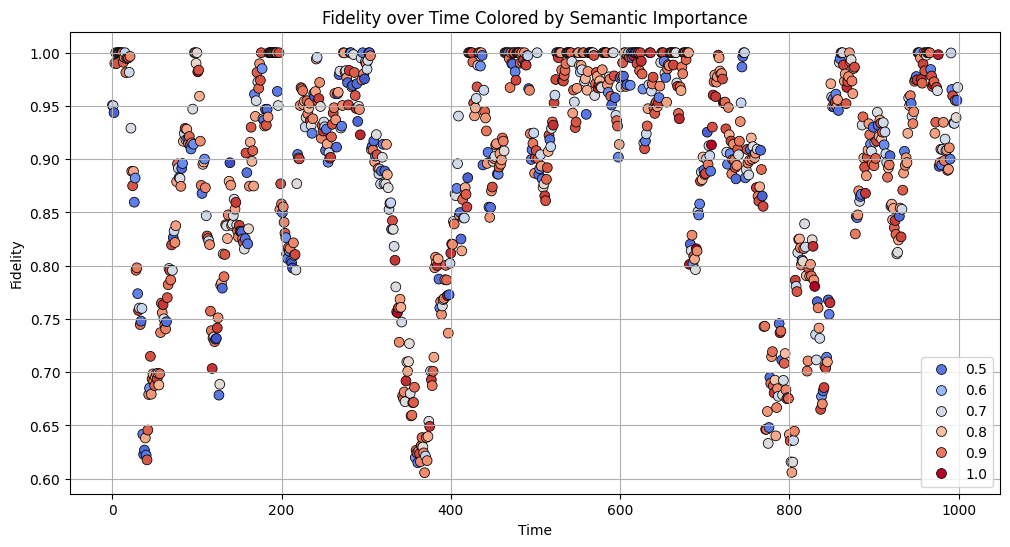

In [17]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=time, y=fidelities, hue=importance_over_time, palette='coolwarm', s=50, edgecolor='black')
plt.title('Fidelity over Time Colored by Semantic Importance')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.grid()
plt.show()


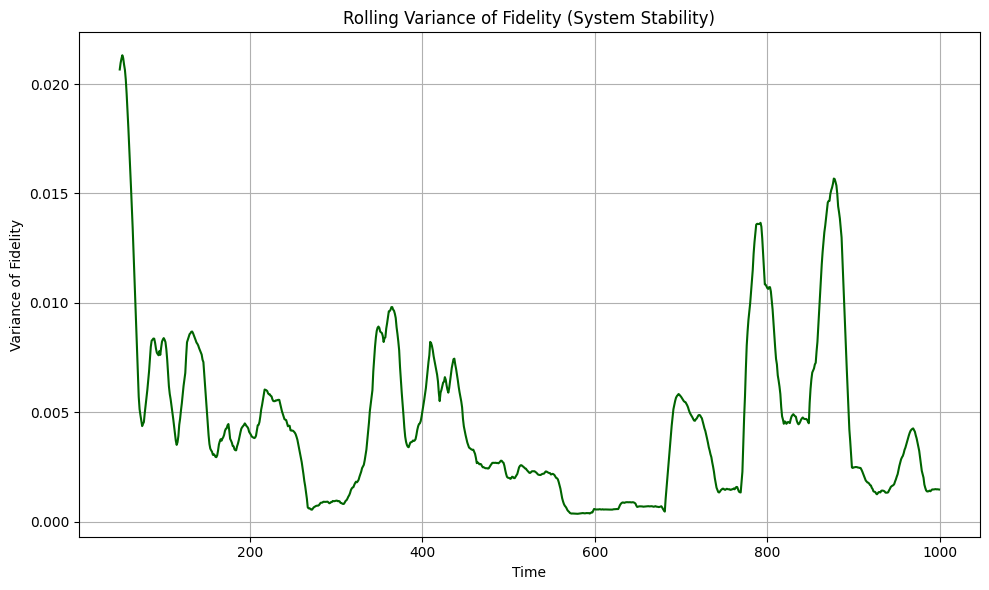

In [19]:
rolling_var = pd.Series(fidelities).rolling(window=50).var()

plt.figure(figsize=(10,6))
plt.plot(time[:len(rolling_var)], rolling_var, color='darkgreen')
plt.title('Rolling Variance of Fidelity (System Stability)')
plt.xlabel('Time')
plt.ylabel('Variance of Fidelity')
plt.grid()
plt.tight_layout()
plt.show()


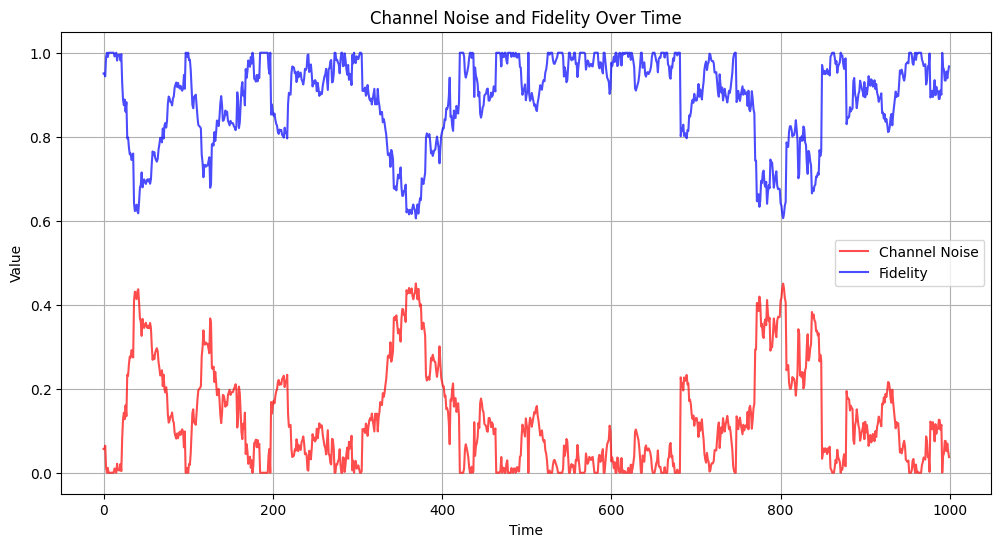

In [21]:
plt.figure(figsize=(12,6))
plt.plot(time, channel_noise_over_time, label='Channel Noise', color='red', alpha=0.7)
plt.plot(time, fidelities, label='Fidelity', color='blue', alpha=0.7)
plt.title('Channel Noise and Fidelity Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()


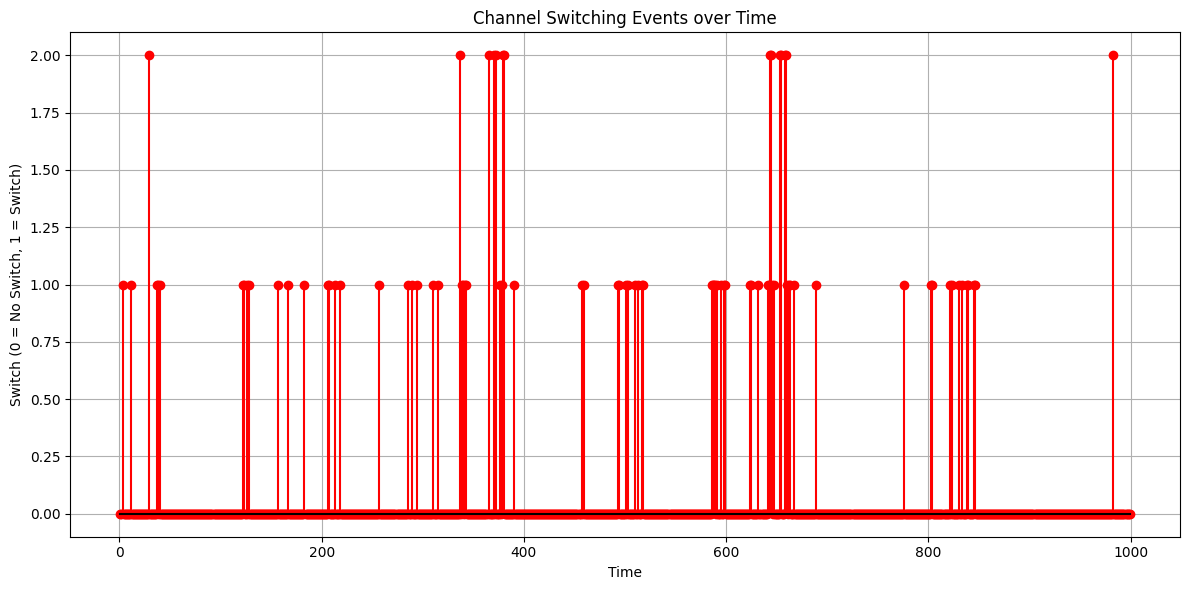

In [22]:
switch_events = np.abs(np.diff(selected_channel_over_time))

plt.figure(figsize=(12,6))
plt.stem(time[1:], switch_events, linefmt='r-', markerfmt='ro', basefmt="k-")
plt.title('Channel Switching Events over Time')
plt.xlabel('Time')
plt.ylabel('Switch (0 = No Switch, 1 = Switch)')
plt.grid()
plt.tight_layout()
plt.show()


<ipython-input-23-ce7d06ff3351>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Channel', y='Fidelity', data=df, palette='Pastel1')


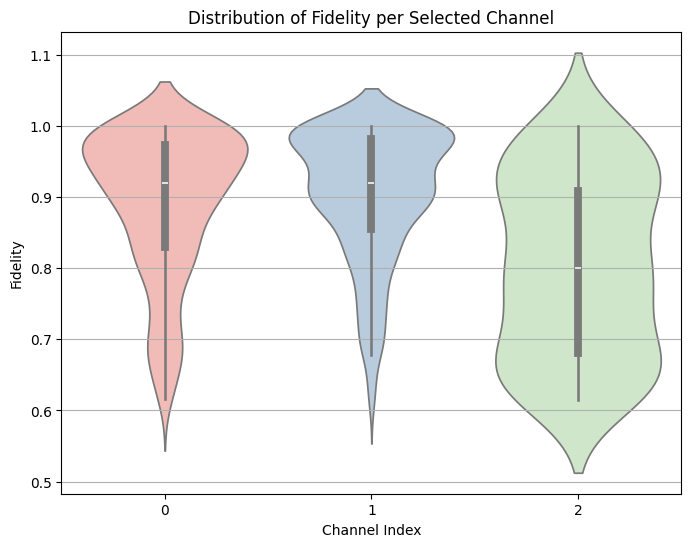

In [23]:
import pandas as pd

df = pd.DataFrame({
    'Fidelity': fidelities,
    'Channel': selected_channel_over_time
})

plt.figure(figsize=(8,6))
sns.violinplot(x='Channel', y='Fidelity', data=df, palette='Pastel1')
plt.title('Distribution of Fidelity per Selected Channel')
plt.xlabel('Channel Index')
plt.ylabel('Fidelity')
plt.grid(True, axis='y')
plt.show()


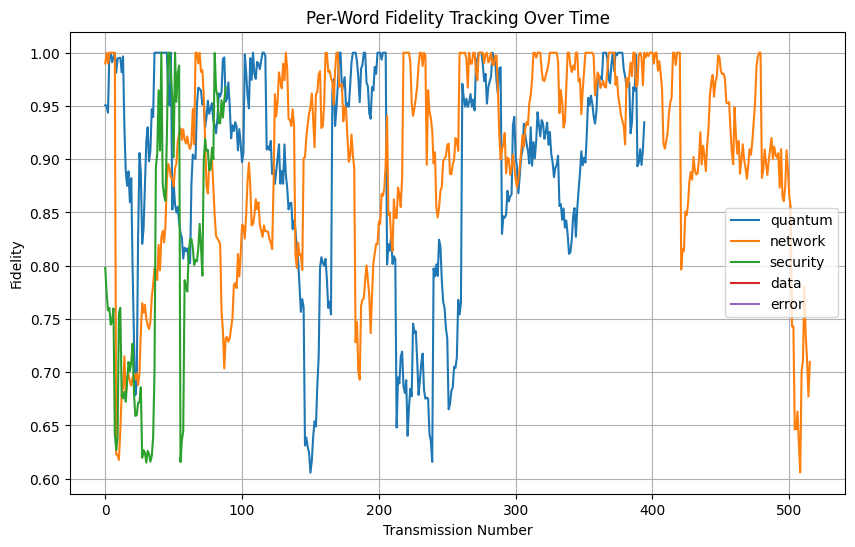

In [24]:
words = ["quantum", "network", "security", "data", "error"]
word_fidelities = {w: [] for w in words}

for t in range(len(fidelities)):
    word_idx = selected_channel_over_time[t]
    word_fidelities[words[word_idx]].append(fidelities[t])

plt.figure(figsize=(10,6))
for w in words:
    plt.plot(np.arange(len(word_fidelities[w])), word_fidelities[w], label=w)

plt.title('Per-Word Fidelity Tracking Over Time')
plt.xlabel('Transmission Number')
plt.ylabel('Fidelity')
plt.legend()
plt.grid()
plt.show()


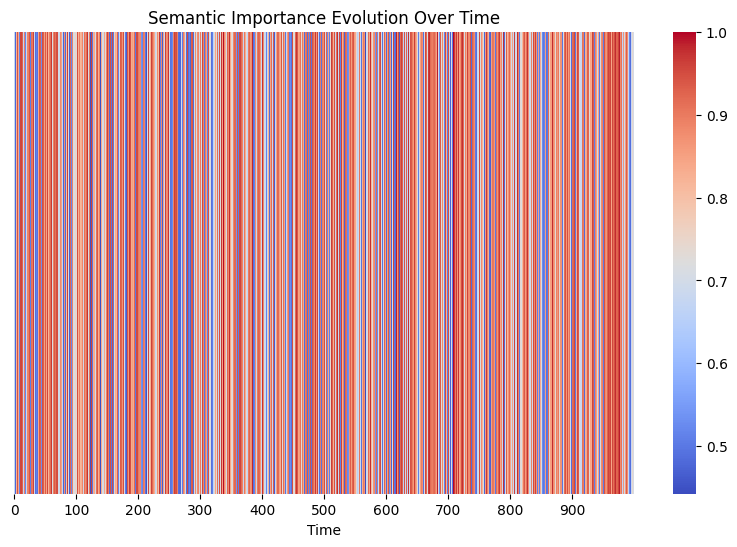

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(np.expand_dims(importance_over_time, axis=0), cmap='coolwarm', cbar=True, xticklabels=100)
plt.title('Semantic Importance Evolution Over Time')
plt.xlabel('Time')
plt.yticks([])
plt.show()


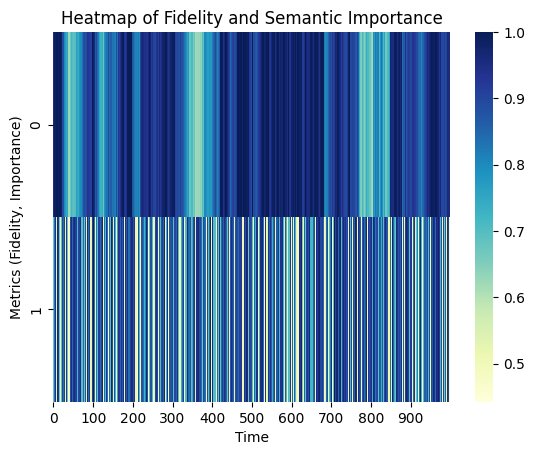

In [26]:
import numpy as np
import seaborn as sns

data = np.vstack([fidelities, importance_over_time])
sns.heatmap(data, cmap="YlGnBu", cbar=True, xticklabels=100)
plt.title("Heatmap of Fidelity and Semantic Importance")
plt.xlabel("Time")
plt.ylabel("Metrics (Fidelity, Importance)")
plt.show()


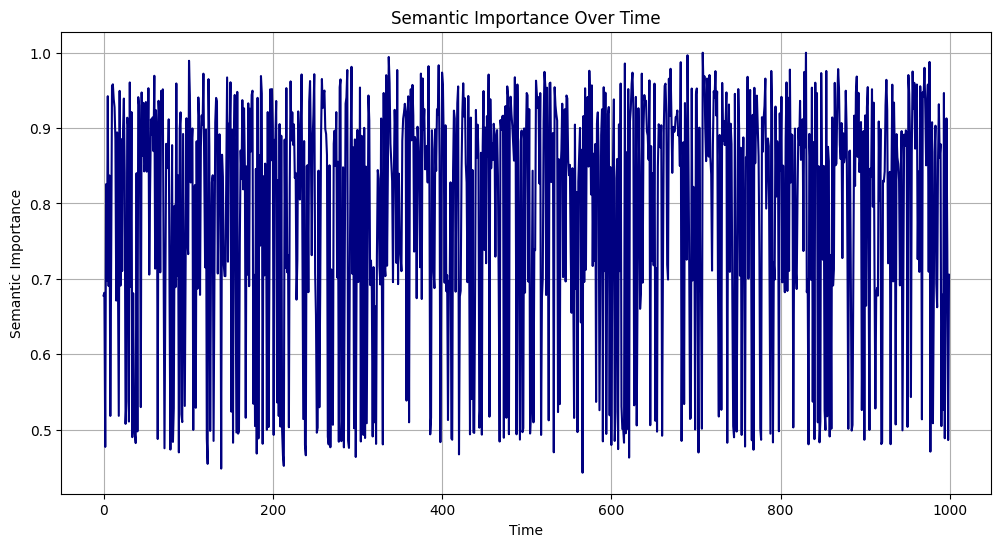

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(time, importance_over_time, color='navy')
plt.title("Semantic Importance Over Time")
plt.xlabel("Time")
plt.ylabel("Semantic Importance")
plt.grid(True)
plt.show()


<ipython-input-30-5531462fe298>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=selected_channel_over_time, y=fidelities, palette='Set2')


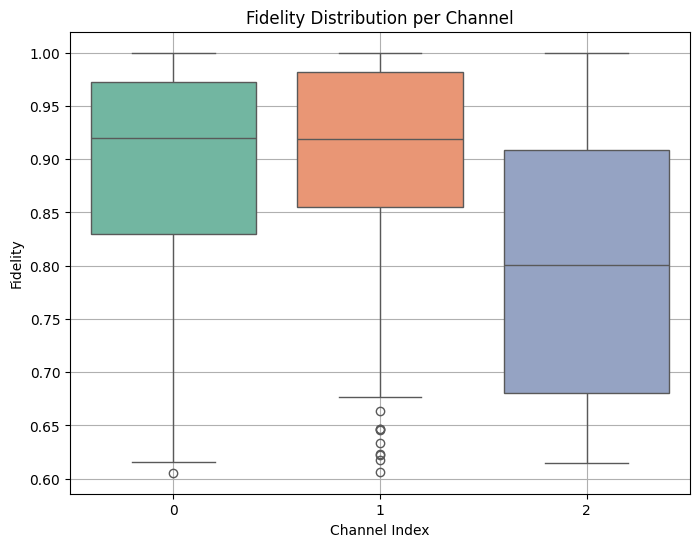

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x=selected_channel_over_time, y=fidelities, palette='Set2')
plt.title("Fidelity Distribution per Channel")
plt.xlabel("Channel Index")
plt.ylabel("Fidelity")
plt.grid(True)
plt.show()


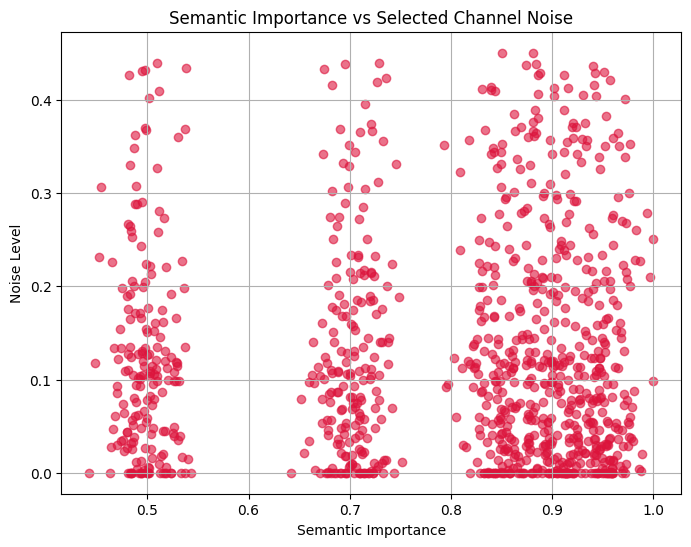

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(importance_over_time, channel_noise_over_time, color='crimson', alpha=0.6)
plt.title('Semantic Importance vs Selected Channel Noise')
plt.xlabel('Semantic Importance')
plt.ylabel('Noise Level')
plt.grid()
plt.show()
